In [1]:
# Si des questions: email: carla.joud@univ-rennes.fr

#bibliothèques utilisées: 
import numpy as np  # permet d'effectuer des calculs numériques
import matplotlib.pyplot as plt #permet de produire des graphes

# **TP2: Équations Différentielles**

## **1) Introduction**
*Répondre en s'appuyant sur la description du TP dans le pdf fourni sur l'ENT: "TP Equations Différentielles"*.

**1.1) Introduire le sujet. Quel est le but de ce TP?** 

*Vous pouvez utiliser du LaTeX si nécessaire dans les cellules* :exp:" $\mathrm{F}(x(t), \frac{dx}{dt}, \frac{d^{2}x}{dt^{2}}, \cdots, \frac{d^{n}x}{dt^{n}},t,\theta)=0$ , $\forall t >0 $ "

Lors de ce TP nous allons voir comment manipuler des équations différentielles, notamment comment les approximer numériquement avec la méthode d'Euler et la méthode de Runge-Kutta.


**1.2) Donner la formule qui indique comment l'état futur $U(t+dt)$ peut être obtenu à partir de $U(t)$ et de la fonction $\frac{dU}{dt}(t)$. Cela suggère comment écrire un algorithme qui calcule les valeurs d'états futures $U(t)$ $t>t_0$ à partir de la valeur d'état initial $U(t_0)$. Expliciter le raisonnement.**

On a la définition de la dérivée :
$$\frac{dU}{dt} \approx \frac{U(t + dt) - U(t)}{dt}$$

En réarrangeant, on obtient :  
$$U(t + dt) \approx U(t) + dt \cdot \frac{dU}{dt}(t)$$
la formule qui indique comment l'état futur $U(t+dt)$ peut être obtenu à partir de $U(t)$ et de la fonction $\frac{dU}{dt}(t)$.

Un algotithme qui calcule les valeurs d'états futures $U(t)t>t_0$ à partir de $U(t_0)$ serait un algotithme d'itération qui : 
- Initialise $U(t_0)$ à partir de la condition initiale
- Pour chaque pas de temps dt calcul $U(t+dt)$
- Répète jusqu'au temps final $t_{max}$


## **2) Méthodes de résolution numérique d'équations différentielles**

**2.1) Méthode explicite d'Euler**

2.1.1) L'idée principale est d'approcher, au voisinage d'un point, une fonction inconnue par sa tangente, qui elle est connue. Donner la formule qui permet de calculer le $U_{k+1}$ en fonction de $U_k$, le pas et $\frac{dU}{dt}$. Expliciter chacun des 4 termes.

Calculer $U_{k+1}$ à partir de $U_k$ :  

$$U_{k+1} = U_k + \Delta t \cdot \left. \frac{dU}{dt} \right|_{t_k}.$$

Avec :  
- $U_{k+1}$ : Valeur approchée de la fonction $U(t)$ à l'instant suivant $t_{k+1} = t_k + \Delta t$.  
- $U_k$ : Valeur de la fonction $U(t)$ au temps actuel $t_k$.  
- $\Delta t$ : Pas de temps, représentant l'intervalle entre $t_k$ et $t_{k+1}$.  
- $\left. \frac{dU}{dt} \right|_{t_k}$ : Dérivée de $U(t)$ évaluée au temps $t_k$.


2.1.2) Compléter le code python et commenter-le.

In [2]:
def Euler(x0, pas, time): 
    x = np.zeros(len(time))
    K1 = np.zeros(len(time))
    
    for i in range(len(time)):
        if i == 0:                    # vérification condition initiale
            x[i] = x0
        else:
            K1 = -x[i-1]              # Calcul de la dérivée K1 à l'instant actuel
            x[i] = x[i-1] + pas * K1  # Mise à jour de la solution avec la méthode d'Euler


    return x

Aide: Pour remplir K1, aller voir la mise en pratique partie 3.

**2.2) Méthode de Runge-Kutta ordre 2**

2.2.1) Cette méthode utilise une estimation intermédiaire pour le calcul de la pente. Décrire cette méthode, et donner la formule qui permet de calculer $U_{k+1}$ en fonction de $U_k$, le pas et $\frac{dU}{dt}$. 

Contrairement à la méthode d'Euler qui utilise uniquement la pente au début de l'intervalle, Runge-Kutta calcule une estimation intermédiaire pour obtenir une meilleure approximation de la pente moyenne sur l'intervalle.

Formule pour $U_{k+1}$ :
$$U_{k+1} = U_k + pas \cdot \frac{\left( f(t_k, U_k) + f\left(t_{k+1}, U_{k+1} \cdot f(t_k, U_k)\right) \right)}{2}$$

Avec :
- $U_{k+1}$ : La valeur de la fonction $U(t)$ au pas suivant.
- $U_k$ : La valeur de la fonction $U(t)$ au temps actuel $t_k$.  
- $pas$ : Le pas de temps.  
- $f(t_k, U_k) = \left. \frac{dU}{dt} \right|_{t_k}$ : La dérivée de $U(t)$ au temps $t_k$.  
- $f\left(t_{k+1}, U_{k+1} \cdot f(t_k, U_k)\right)$ : La dérivée calculée à un point intermédiaire.


2.2.2) Compléter le code python et commenter-le.

In [3]:
def Runge_Kutta_2(x0, pas, time):
    K1 = np.zeros(len(time))
    K2 = np.zeros(len(time))
    x = np.zeros(len(time))
    for i in range(len(time)):
        if i == 0: # vérification condition initiale
            x[i] = x0
        else:
            K1 = -x[i-1]
            K2 = -(x[i-1] + pas * K1)
            x[i] = x[i-1] + pas * (K1 + K2) / 2
    return x


## **3) Partie 1) : Mise en pratique sur un exemple:** 

Soit l'équation différentielle du premier ordre :

$$\left\{
    \begin{array}{ll}  x'(t)= -x(t) \\ 
    x(0)=x_0 \end{array}
\right.$$  

La solution théorique est connue, et égale à : $x(t)= e^{(-t)} $.

   


Pour commencer, il est nécessaire de définir un intervalle de temps sur lequel on veut calculer la solution. 
On définit une suite croissante de $K$ instants $v_k$, $k=1,\cdots,K$ telle que: $t_1=v_0<v_1<\cdots<v_K=t_{max}$ et que le pas fixe de discrétisation $\alpha=v_{k+1}-v_k$, $\forall k$ ne soit pas trop grand.

In [12]:

tmax = 20 # durée simulation
pas = 0.25 # pas fixe alpha
time = np.arange(0, tmax, pas) # Discrétisation


3.1) Pour évaluer l'erreur des méthodes d'approximation par comparaison avec la solution théorique, calculez la solution théorique. Stockez les valeurs obtenues dans un vecteur, où chaque entrée correspond à la solution théorique pour un des $K$ instants de temps. Assurez-vous que le vecteur contient toutes les valeurs nécessaires pour effectuer la comparaison avec les résultats numériques.

In [13]:
# --------Courbe réelle - --------
x_th =np.exp(-time) # solution théorique

3.2) Calculer pour un pas de $0.5$ la solution obtenue par la méthode d'Euler. Afficher sur un graphe la solution théorique et la solution approximée par la méthode d'Euler.

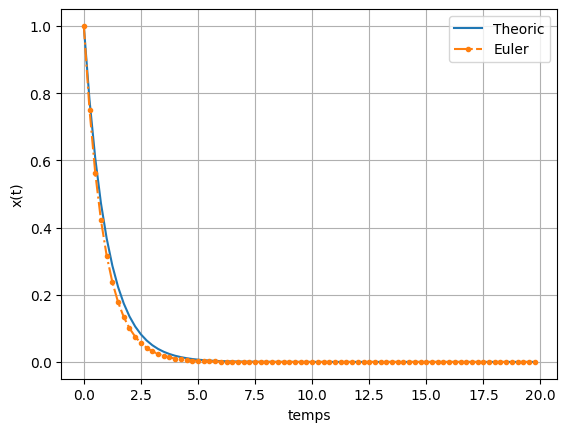

In [14]:
x0=1 #Condition initiale
tmax = 20 # durée simulation
pas = 0.25 # pas fixe alpha
time = np.arange(0, tmax, pas) # Discrétisation
x_Euler=Euler(x0,pas,time)

# ---------visu - --------
plt.figure()
plt.plot(time, x_th, label='Theoric')
plt.plot(time, x_Euler, '-..', label='Euler')
plt.xlabel('temps')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
plt.show()


On constate que les courbes théoriques et approximés de la méthode d'Euler sont très similaires, ce qui valide notre méthode.

3.3) Afficher les graphes de l'erreur pour 3 valeurs de pas: $a_1=0.1$ , $a_2=0.5$ et $a=1$ : 

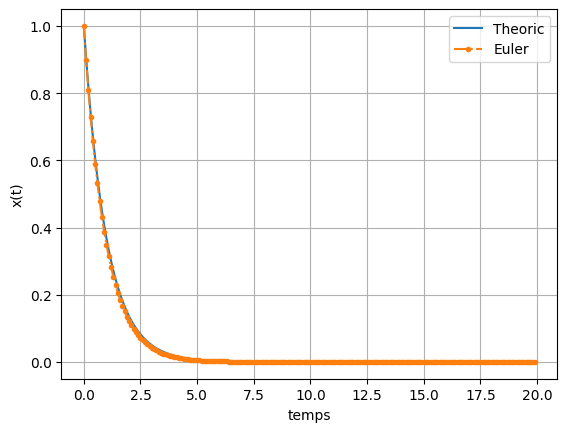

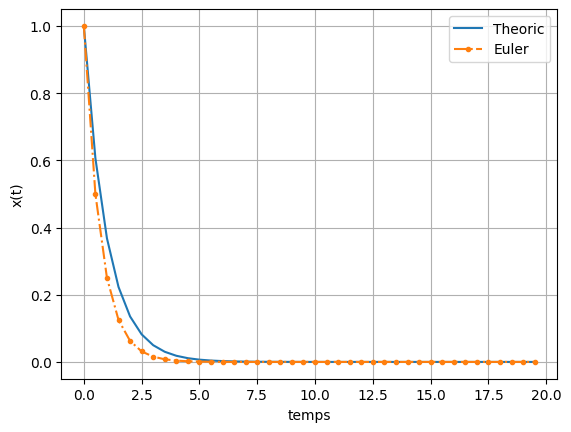

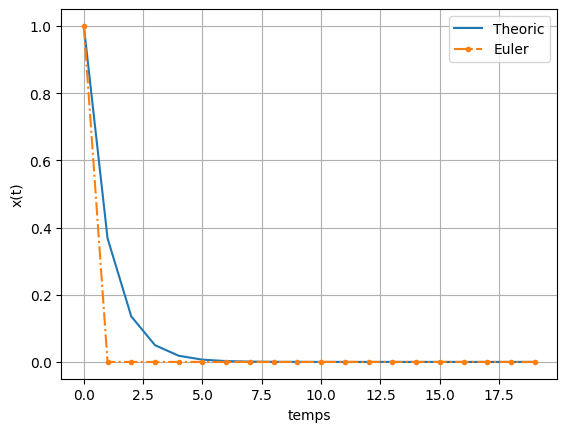

In [15]:
## Euler

## pas 1
pas1 = 0.1 # pas fixe alpha
time1 = np.arange(0, tmax, pas1)
x_Euler1= Euler(x0, pas1, time1)
x_th1 =  np.exp(-time1) # solution théorique

## pas 2
pas2 = 0.5 # pas fixe alpha
time2 = np.arange(0, tmax, pas2) 
x_Euler2 = Euler(x0, pas2, time2)  
x_th2 = np.exp(-time2) 

## pas 3
pas3 = 1 # pas fixe alpha
time3 = np.arange(0, tmax, pas3)  
x_Euler3 = Euler(x0, pas3, time3)  
x_th3 = np.exp(-time3)

## Affichage des 3 graphes

# plot 1 : 
plt.figure() # 3 lignes, 1 colonne, 1er graphique
plt.plot(time1, x_th1, label='Theoric')
plt.plot(time1, x_Euler1, '-..', label='Euler')
plt.xlabel('temps')
plt.ylabel('x(t)') 
plt.grid()
plt.legend()


# plot 2 : 
plt.figure() # 3 lignes, 1 colonne, 2e graphique
plt.plot(time2, x_th2, label='Theoric')
plt.plot(time2, x_Euler2, '-..', label='Euler')
plt.xlabel('temps')
plt.ylabel('x(t)')
plt.grid()
plt.legend()

# plot 3 : 
plt.figure() # 3 lignes, 1 colonne, 3e graphique
plt.plot(time3, x_th3, label='Theoric')
plt.plot(time3, x_Euler3, '-..', label='Euler')
plt.xlabel('temps')
plt.ylabel('x(t)')
plt.grid()
plt.legend()

plt.show()

On remarque que plus le pas augmente, plus la courbe d'approximation est imprécise et éloignée de la théorique.

3.4) Refaire la même chose pour la méthode de Runge-Kutta d'ordre 2. Afficher les graphes de l'erreur pour 3 valeurs de pas: $a_1=0.1$ , $a_2=0.5$ et $a=1$ et commenter les résultats en comparant avec la solution théorique.

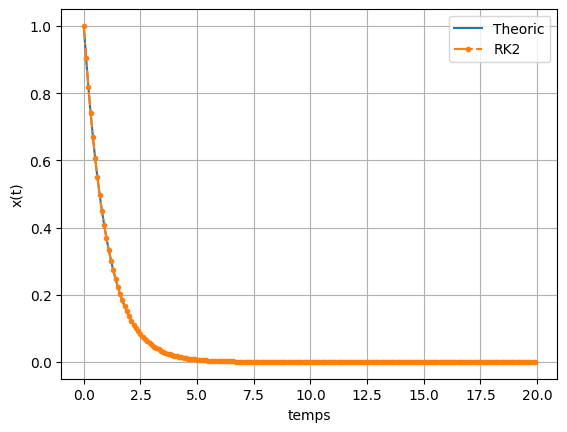

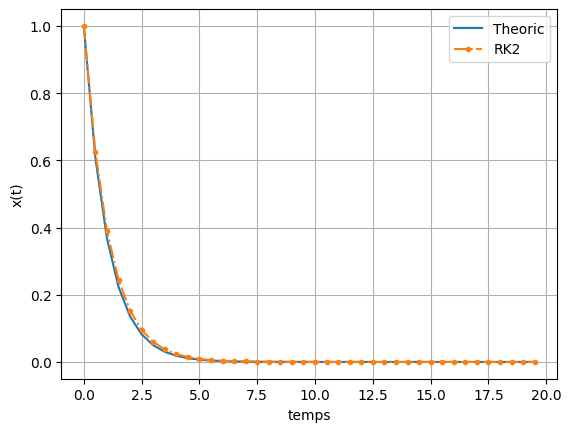

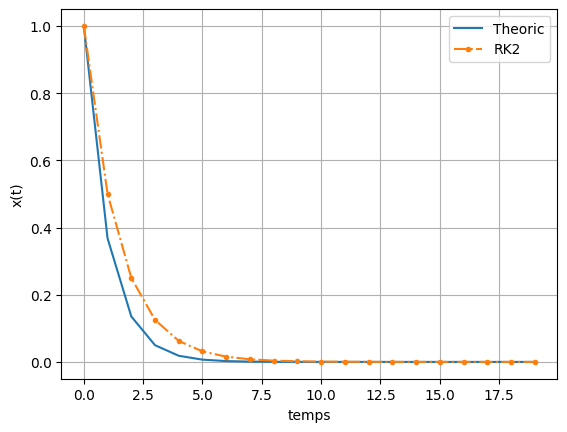

In [16]:
## Runge-Kutta

## pas 1
pas1 = 0.1 # pas fixe alpha
time1 = np.arange(0, tmax, pas1)
x_Runge_Kutta1= Runge_Kutta_2(x0, pas1, time1)
x_th1 =  np.exp(-time1) # solution théorique

## pas 2
pas2 = 0.5 # pas fixe alpha
time2 = np.arange(0, tmax, pas2) 
x_Runge_Kutta2 = Runge_Kutta_2(x0, pas2, time2)  
x_th2 = np.exp(-time2) 

## pas 3
pas3 = 1 # pas fixe alpha
time3 = np.arange(0, tmax, pas3)
x_Runge_Kutta3 = Runge_Kutta_2(x0, pas3, time3)
x_th3 = np.exp(-time3)

## Affichage des 3 graphes

# plot 1 : 
plt.figure()# 3 lignes, 1 colonne, 1er graphique
plt.plot(time1, x_th1, label='Theoric')
plt.plot(time1, x_Runge_Kutta1, '-..', label='RK2')
plt.xlabel('temps')
plt.ylabel('x(t)') 
plt.grid()
plt.legend()


# plot 2 : 
plt.figure() # 3 lignes, 1 colonne, 2e graphique
plt.plot(time2, x_th2, label='Theoric')
plt.plot(time2, x_Runge_Kutta2, '-..', label='RK2')
plt.xlabel('temps')
plt.ylabel('x(t)')
plt.grid()
plt.legend()

# plot 3 : 
plt.figure() # 3 lignes, 1 colonne, 3e graphique
plt.plot(time3, x_th3, label='Theoric')
plt.plot(time3, x_Runge_Kutta3, '-..', label='RK2')
plt.xlabel('temps')
plt.ylabel('x(t)')
plt.grid()
plt.legend()

plt.show()

Ici aussi, on remarque que plus le pas augmente, plus la la qualité de l'approximation diminue.

3.5) Étudier l'influence du pas de simulation sur les résultats obtenus pour la méthode d'Euler et de Runge-Kutta d'ordre 2. Dans ce but, afficher un graphe de l'erreur $norm(u-u_{th})$ en fonction du pas en échelle log-log pour les 2 méthodes. 

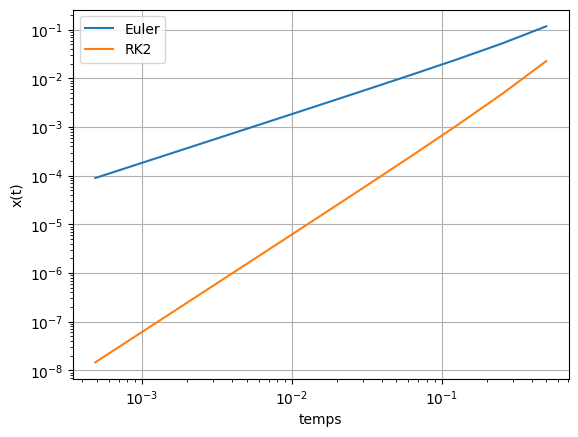

In [17]:
n=np.array([2,4,8,16,32,64,128,256,512,1024,2048]) # Nombre de points
err=np.zeros([2,len(n)]); #Stocker l'erreur des 2 méthodes
x0=1 #Condition initiale
tmax = 20 # durée simulation

for j in range(len(n)):

    pas= 1 / n[j]
    time_n = np.arange(0,tmax , pas)
    x_th= np.exp(-time_n)
    
    # Euler
    x_approx_Euler = Euler(x0, pas, time_n)
    x_approx_Euler_norm = np.linalg.norm(x_approx_Euler - x_th, ord=np.inf)
    err[0, j] = x_approx_Euler_norm

    
    # Runge-Kutta 2
    x_approx_RK2 = Runge_Kutta_2(x0, pas, time_n)
    err[1, j] = np.linalg.norm(x_approx_RK2 - x_th, ord=np.inf)
    

# ---------visu - --------

plt.figure()
# Courbe pour la méthode Euler
plt.loglog(1.0 / n, err[0,:], label='Euler')
# Courbe pour la méthode RK2
plt.loglog(1.0 / n, err[1, :], label='RK2')
plt.xlabel('temps')
plt.ylabel('x(t)')
plt.grid()
plt.legend()
plt.show()




3.6) Lors de l'analyse et comparaison de méthodes numériques, l'échelle log-log permet d'identifier la vitesse de convergence. Par exemple, si une méthode a une erreur proportionnelle à $p$, la pente sur un graphique log-log est $p$, ce qui simplifie l'estimation de l'ordre de la méthode. 

Mathématiquement, cela s'explique par :
$$erreur(h)=norm(u_{th}-u_{approx})=Ch^{p}$$
En passant au log des deux côtés de l'équation, on a :

$$ 
\log(\text{erreur}(h)) = \log(C) + p \cdot \log(h)
$$
Une fonction linéaire où p est la pente 

Déterminer les pentes des 2 graphes log-log des 2 méthodes et donner leur ordre.

*Aide* *Aller voir la doc de la fonciton "np.polyfit"*


In [18]:
# Conversion logarithmique
log_pas = np.log10(1.0 / n)  # log10(1/n)

# Pente Euler
log_Err_1=np.log10(err[0,:])
p_method_1 = np.polyfit(log_pas, log_Err_1, 1)  # [pente, intercept] pour méthode 1

# Pente Runge-Kutta Ordre 2
log_pas=np.log10(1./n)
log_Err_2=np.log10(err[1,:])
p_method_2 = np.polyfit(log_pas, log_Err_2, 1)  # [pente, intercept] pour méthode 2

# Affichage des pentes
print(f"Pente pour la méthode 1 (Euler) : {p_method_1[0]:.2f}")
print(f"Pente pour la méthode 2 (Runge-Kutta) : {p_method_2[0]:.2f}")

Pente pour la méthode 1 (Euler) : 1.03
Pente pour la méthode 2 (Runge-Kutta) : 2.04


On remarque que le pente pour Runge-Kutta est deux fois plus élevée que pour Euler. Cela explique pourquoi Runge-Kutta est plus efficace pour atteindre une meilleure précision.

## **4) Partie 2) Dynamique des populations**

On considère la modélisation de l'évolution temporelle, sur un territoire délimité, d'un nombre de prédateurs $R(t)$ et d'un nombre de proies $L(t)$. Ces deux populations n'étant pas supposées interférées significativement, du point de vue de leurs disparitions/reproductions, avec d'autres populations animales.

Lotka et Voltera ont proposé le modèle ci-dessous pour l'évolution conjointe de 2 populations:

$$\left\{
    \begin{array}{ll} \frac{dR}{dt}(t) = -h R(t) + bR(t)L(t) \\ 
    \frac{dL}{dt}(t) = -c R(t)L(t) + a L(t) \end{array}
\right.$$  



4.1) Interpréter qualitativement ce modèle en commentant un par un le rôle joué par chacun des $4$ termes dans le système d'équation précédent. Que se passe-t-il quand ils varient ? 

Rôle du premier terme: " $hR(t)$" : mortalité naturelle des prédateurs.

Rôle du deuxième terme: " $aL(t)$" : croissance naturelle des proies.

Rôle du troisième terme: " $bR(t)L(t)$" : interaction de prédation favorisant la reproduction des prédateurs.

Rôle du quatrième terme:" $cR(t)L(t)$" : prédation réduisant la population de proies.


4.2) Compléter ce code Python qui résout ce système d'équations différentielles pour les deux méthodes Euler et Runge-Kutta:

In [48]:
def Lotka_Voltera_Euler(a,b,c,L_0, R_0, pas_eul, time):
    R = np.zeros(len(time))
    L = np.zeros(len(time))
    L[0]=L_0
    R[0]=R_0
    for i in range(len(time) - 1):
        f1 = a * L[i] - c * R[i] * L[i]
        f2 = -h * R[i] + b * R[i] * L[i]
        L[i + 1] = L[i] + pas_eul * f1
        R[i + 1] = R[i] + pas_eul * f2
    return L, R


In [49]:
def Lotka_Voltera_RK2(a,b,c,L_0, R_0, pas_RK2,time):
    R = np.zeros(len(time))
    L = np.zeros(len(time))
    R[0]=R_0
    L[0]=L_0
    for i in range(len(time) - 1):

        K1_L = a * L[i] - c * R[i] * L[i]
        K1_R = b * R[i] * L[i] - h * R[i]

        K2_L = a * (L[i] + pas_RK2 * K1_L) - c * (R[i] + pas_RK2 * K1_R) * (L[i] + pas_RK2 * K1_L)
        K2_R = b * (R[i] + pas_RK2 * K1_R) * (L[i] + pas_RK2 * K1_L) - h * (R[i] + pas_RK2 * K1_R)


        R[i + 1] = R[i] + pas_RK2 * (K2_R) / 2
        L[i + 1] = L[i] + pas_RK2 * (K2_L) / 2
    return L, R

4.3) Tester sur exemple vos codes:

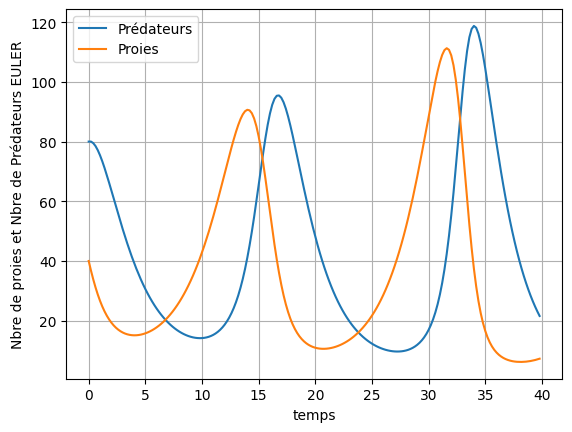

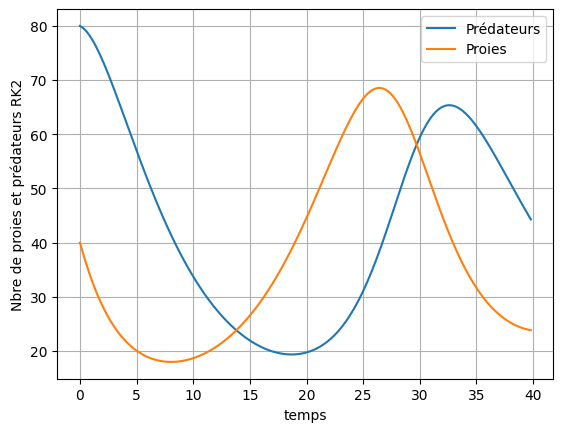

In [50]:
# --Simul modèle Lotka - Volterra - -------------

# ----------paramètres modèle - -----------------
a = 0.4  # taux de croissance proies en absence prédateurs
h = 0.4  # taux décès prédateurs en l'absence de proies
b = 0.01 # influence prédateurs sur proies
c = 0.01 # influence proies sur prédateurs

pas=0.2
pas_eul =pas # pas d'Euler
pas_RK2=pas  # pas RK2
tmax = 40    # durée simulation
time = np.arange(0,tmax,pas) # Subdivision du temps

# --------initialisations - --------
L_0 = 40
R_0 = 80

##METHOD
L_euler, R_euler = Lotka_Voltera_Euler(a, b, c, L_0, R_0, pas_eul, time)
L_RK2, R_RK2 = Lotka_Voltera_RK2(a, b, c, L_0, R_0, pas_RK2, time)

# --------------------------------
plt.figure()
plt.plot(time, R_euler, label='Prédateurs Euler')
plt.plot(time, L_euler, label='Proies Euler')
limit1 = plt.axis()
plt.xlabel('temps')
plt.ylabel('Nbre de proies et Nbre de Prédateurs EULER')
plt.grid()
plt.legend(['Prédateurs','Proies'])

 # ---------visu Nbre (prédateurs) - -------
plt.figure()
plt.plot(time, R_RK2, label='Prédateurs RK2')
plt.plot(time, L_RK2, label='Proies RK2')
plt.xlabel('temps')
plt.ylabel('Nbre de proies et prédateurs RK2')
plt.grid()
plt.legend(['Prédateurs','Proies'])

plt.show()


4.3) Tester Pour $L_0=40$ et $R_0=40$, qu'on appelle un point stationnaire et affichez le résultat.

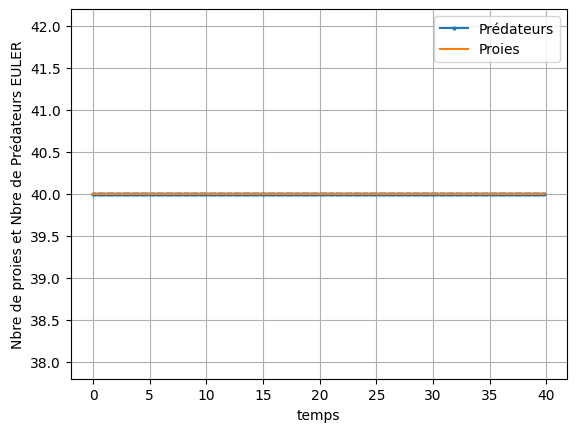

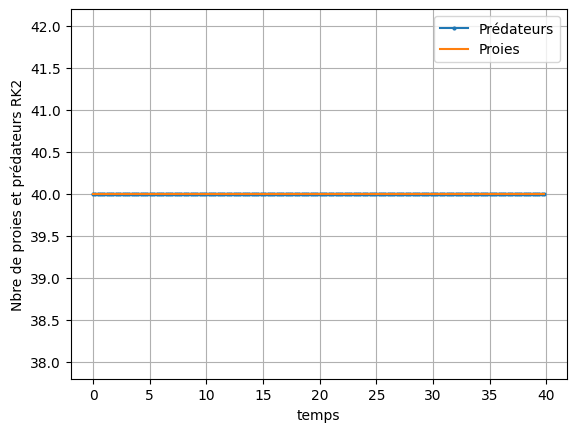

In [65]:
# --------initialisations - --------
L_0 = 40
R_0 = 40


##METHOD
L_euler, R_euler = Lotka_Voltera_Euler(a, b, c, L_0, R_0, pas_eul, time)
L_RK2, R_RK2 = Lotka_Voltera_RK2(a, b, c, L_0, R_0, pas_RK2, time)

# --------------------------------
plt.figure()
plt.plot(time, R_euler, '-o',markersize=2, label='Prédateurs Euler') # ajout de o sur la courbe bleu sinon elle ne se voit pas car confondue avec la orange.
plt.plot(time, L_euler, label='Proies Euler')
limit1 = plt.axis()
plt.xlabel('temps')
plt.ylabel('Nbre de proies et Nbre de Prédateurs EULER')
plt.grid()
plt.legend(['Prédateurs','Proies'])

 # ---------visu Nbre (prédateurs) - -------
plt.figure()
plt.plot(time, R_RK2, '-o',markersize=2, label='Prédateurs RK2')   # ajout de o sur la courbe bleu sinon elle ne se voit pas car confondue avec la orange.
plt.plot(time, L_RK2, label='Proies RK2')
plt.xlabel('temps')
plt.ylabel('Nbre de proies et prédateurs RK2')
plt.grid()
plt.legend(['Prédateurs','Proies'])

plt.show()


On remarque bien que nous sommes sur un point stationnaire par le fait que les deux courbes sont confondues et forment une droite constante. Autant pour le cas de la méthode d'Euler ou de Runge-Kutta.

4.4) Étude de l'influence du pas pour les deux méthodes: tester pour un pas de $0.1, 0.25,0.5,0.75$ et $1$. 

C:\Users\bapti\AppData\Local\Temp\ipykernel_17272\3959514793.py:7: RuntimeWarning: overflow encountered in double_scalars
  f1 = a * L[i] - c * R[i] * L[i]
C:\Users\bapti\AppData\Local\Temp\ipykernel_17272\3959514793.py:8: RuntimeWarning: overflow encountered in double_scalars
  f2 = -h * R[i] + b * R[i] * L[i]
C:\Users\bapti\AppData\Local\Temp\ipykernel_17272\3959514793.py:8: RuntimeWarning: invalid value encountered in double_scalars
  f2 = -h * R[i] + b * R[i] * L[i]


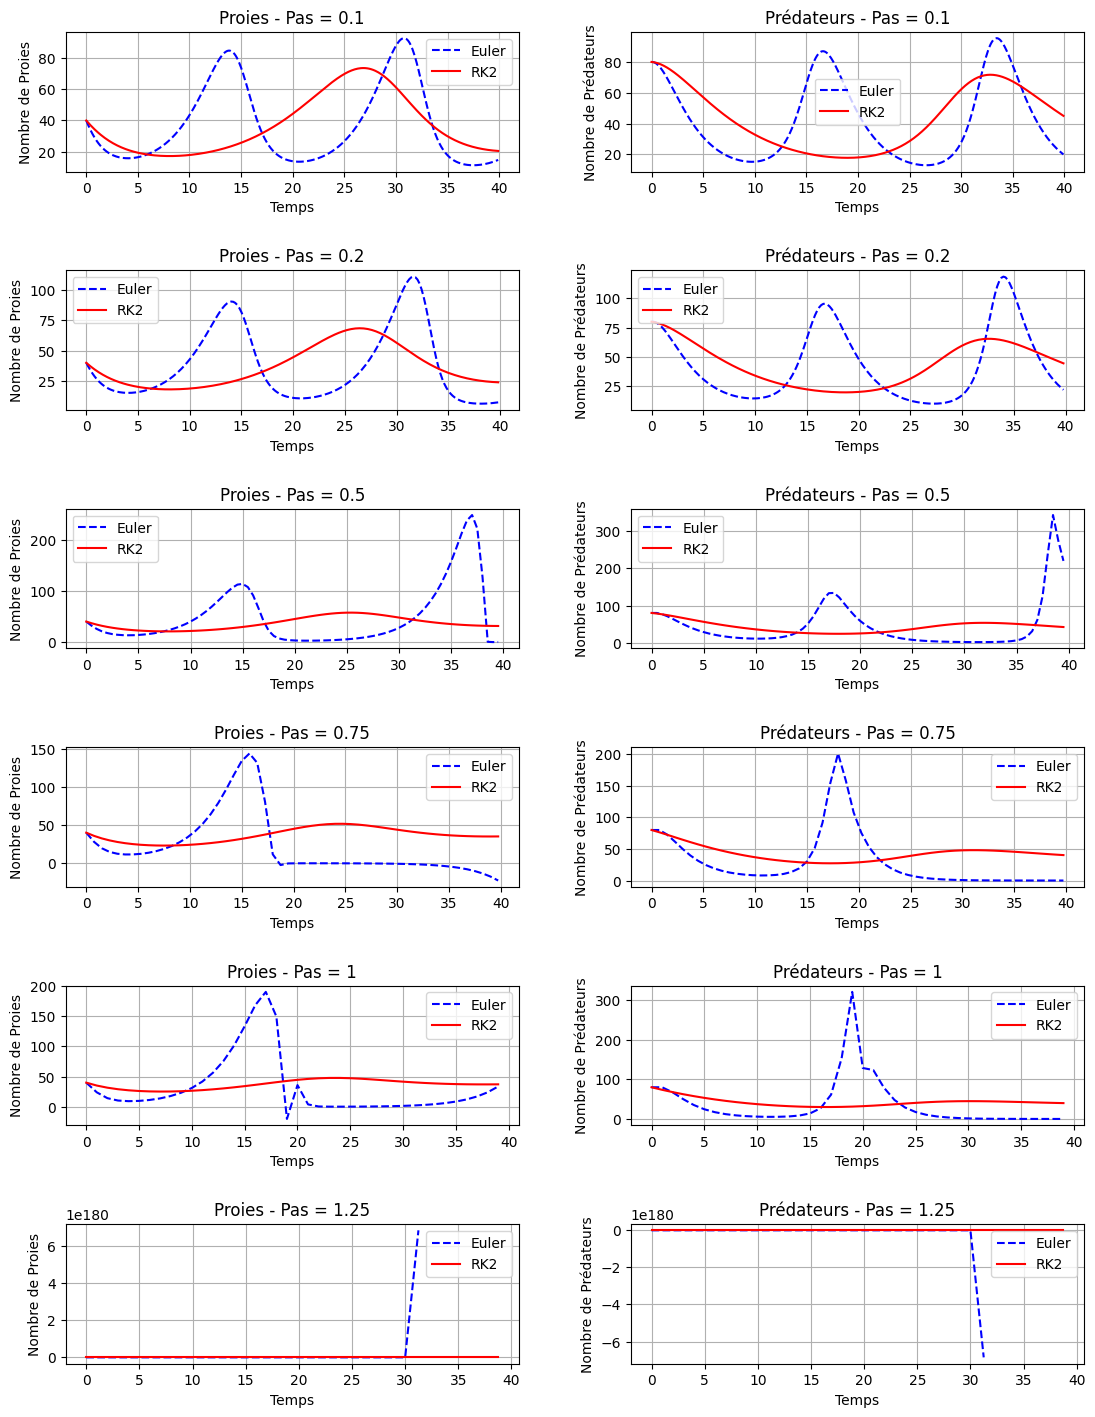

In [72]:

## Affichage des 6 graphes pour les 2 méthodes pour les Proies et les prédateurs
Liste_pas=[0.1,0.2,0.5,0.75,1,1.25]

# --------initialisations - --------
L_0 = 40
R_0 = 80

## Affichage des 7 graphes pour les 2 méthodes pour les Proies et les prédateurs
fig, axs = plt.subplots(len(Liste_pas), 2, figsize=(12, 15))
fig.tight_layout(pad=5.0)  # Taille de la figure
for i, pas in enumerate(Liste_pas): 
    
    time = np.arange(0,tmax,pas)
    dt_eul =pas # pas d'Euler
    pas_RK2=pas # pas RK2
    ## METHODS
    L_Euler, R_Euler = Lotka_Voltera_Euler(a, b, c, L_0, R_0, dt_eul, time)
    L_RK2, R_RK2 = Lotka_Voltera_RK2(a, b, c, L_0, R_0, pas_RK2, time)


    
    # Graphe des proies
    axs[i, 0].plot(time, L_Euler, label="Euler", color="blue", linestyle="--")
    axs[i, 0].plot(time, L_RK2, label="RK2", color="red")
    axs[i, 0].set_title(f"Proies - Pas = {pas}")
    axs[i, 0].set_xlabel("Temps")
    axs[i, 0].set_ylabel("Nombre de Proies")
    axs[i, 0].grid(True)
    axs[i, 0].legend()

    # Graphe des prédateurs
    axs[i, 1].plot(time, R_Euler, label="Euler", color="blue", linestyle="--")
    axs[i, 1].plot(time, R_RK2, label="RK2", color="red")
    axs[i, 1].set_title(f"Prédateurs - Pas = {pas}")
    axs[i, 1].set_xlabel("Temps")
    axs[i, 1].set_ylabel("Nombre de Prédateurs")
    axs[i, 1].grid(True)
    axs[i, 1].legend()

# Affichage final
plt.show()

Que remarquez-vous quant à la qualité de l'approximation pour les deux méthodes? À partir de quelle valeur de pas Euler ne fonctionne plus? À partir de quel valeur de pas Runge-Kutta 2 ne fonctionne plus? Conclure sur la comparaison de l'efficacité des deux méthodes? 


La méthode d'Euler commence à échouer avec des oscillations déformées dès que le pas dépasse 0.5. En revanche, la méthode Runge-Kutta 2 (RK2), plus stable, plus précise et reste cohérente jusqu'à des pas de 1 mais échoue pour des pas asser grand comme 1.25, où elle diverge également. RK2 est donc plus efficace et plus robuste qu'Euler pour des pas modérés, mais les deux méthodes nécessitent des pas asser petits pour garantir une approximation correcte.

## **5) Conclusion**
*Résumer le travail de ce TP. Donner un exemple d'utilisation d'une de ces méthodes dans un domaine d'application (différent de la dynamique des populations).*

Lors de ce TP, nous avons étudié deux méthodes numériques pour résoudre les équations différentielles du modèle de Lotka-Volterra : la méthode d'Euler et la méthode de Runge-Kutta d'ordre 2. Nous avons analysé leur précision et stabilité en fonction du pas de temps. La méthode Runge-Kutta s'est avérée plus performante pas modérés, tandis que la méthode d'Euler devient imprécise et instable lorsque le pas est trop grand.
On comprend donc l'importance du choix du pas ainsi que la méthode en fonction des cas.

Un autre exemple d'application de ces méthodes serait pour la modélisation des circuits électriques avec l'étude des circuits RLC où les courants et tensions évoluent selon des equations différentiels.